# Analysis of Contact Tracing Applications

In [18]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tracking import config, utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
sns.set(font_scale=1.5)

## Loading data

In [20]:
df_apps = pd.read_csv(config.data / 'project-data - all-apps.csv')

In [21]:
df_apps

,name,country,links,platform,data_type,bluetooth,gps,centralized,status,data_storage,...,central_id_storage,data_persistence_days,government,contact_trace_aid,opt_in,open_source,encryption,covid_positive_verification,quarantine_enforcement,notes
0,COVIDSafe,Australia,https://www.health.gov.au/resources/apps-and-t...,mobile app,bluetooth,yes,no,NaN,NaN,local,...,yes,21,yes,yes,yes,yes,yes,test,NaN,based on TraceTogether
1,Coronavirus Australia,Australia,health.gov.au,mobile app,NaN,no,no,NaN,NaN,NaN,...,NaN,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN
2,Stopp Corona,Austria,https://www.roteskreuz.at/site/faq-app-stopp-c...,mobile app,bluetooth,yes,no,NaN,NaN,local,...,no,14,yes,yes,yes,NaN,yes,NaN,NaN,NaN
3,BeAware,Bahrain,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,yes,released,central,...,yes,14,yes,yes,yes,no,NaN,test,yes,NaN
4,ViruSafe,Bulgaria,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,NaN,NaN,NaN,...,yes,NaN,yes,yes,yes,yes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Coalition,France,http://CoalitionNetwork.org,mobile app,bluetooth,yes,no,no,released,local,...,no,NaN,yes,yes,yes,NaN,NaN,NaN,NaN,NaN
93,CoroWarner,Turkey,https://www.aa.com.tr/en/latest-on-coronavirus...,mobile app,gps + bluetooth,yes,yes,NaN,development,NaN,...,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Corona GO,Germany,https://corona-go.de/,mobile app,bluetooth,yes,no,no,development,local,...,no,14,no,yes,yes,yes,NaN,NaN,NaN,NaN
95,my co:radar,Germany,http://mycoradar.de/my-coradar-eu/,mobile app,bluetooth,yes,no,no,development,local,...,no,20,no,yes,yes,yes,NaN,NaN,NaN,NaN


In [22]:
df_apps = (df_apps.fillna({
    'open_source': 'no',
    'quarantine_enforcement': 'no',
    'government': 'no'
})
 .fillna('unknown'))
df_apps['notes'] = df_apps['notes'].replace('unknown', '')

In [23]:
utils.display_all_cols(df_apps)

,name,country,links,platform,data_type,bluetooth,gps,centralized,status,data_storage,linkage_method,protocol,anon_method,central_id_storage,data_persistence_days,government,contact_trace_aid,opt_in,open_source,encryption,covid_positive_verification,quarantine_enforcement,notes
0,COVIDSafe,Australia,https://www.health.gov.au/resources/apps-and-t...,mobile app,bluetooth,yes,no,unknown,unknown,local,exchange temporary ids,BlueTrace,pseudonymous,yes,21,yes,yes,yes,yes,yes,test,no,based on TraceTogether
1,Coronavirus Australia,Australia,health.gov.au,mobile app,unknown,no,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,yes,no,unknown,no,unknown,unknown,no,
2,Stopp Corona,Austria,https://www.roteskreuz.at/site/faq-app-stopp-c...,mobile app,bluetooth,yes,no,unknown,unknown,local,exchange temporary ids,p2pkit,pseudonymous,no,14,yes,yes,yes,no,yes,unknown,no,
3,BeAware,Bahrain,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,yes,released,central,unknown,unknown,none,yes,14,yes,yes,yes,no,unknown,test,yes,
4,ViruSafe,Bulgaria,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,unknown,unknown,unknown,unknown,unknown,unknown,yes,unknown,yes,yes,yes,yes,unknown,unknown,no,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Coalition,France,http://CoalitionNetwork.org,mobile app,bluetooth,yes,no,no,released,local,unknown,Whisper,anonymous,no,unknown,yes,yes,yes,no,unknown,unknown,no,
93,CoroWarner,Turkey,https://www.aa.com.tr/en/latest-on-coronavirus...,mobile app,gps + bluetooth,yes,yes,unknown,development,unknown,unknown,unknown,unknown,unknown,unknown,no,unknown,unknown,no,unknown,unknown,no,
94,Corona GO,Germany,https://corona-go.de/,mobile app,bluetooth,yes,no,no,development,local,unknown,TCN,anonymous,no,14,no,yes,yes,yes,unknown,unknown,no,
95,my co:radar,Germany,http://mycoradar.de/my-coradar-eu/,mobile app,bluetooth,yes,no,no,development,local,unknown,TCN,pseudonymnous,no,20,no,yes,yes,yes,unknown,unknown,no,


## Descriptive stats

In [24]:
df_apps['name'].nunique()

96

In [25]:
df_apps['country'].nunique()

45

In [26]:
df_apps['country'].value_counts()

India              15
United States      12
Germany             8
unknown             3
Israel              3
South Korea         3
Italy               3
EU                  3
Australia           2
Global              2
Turkey              2
Poland              2
Russia              2
Spain               2
Austria             2
France              2
Czechia             2
Bulgaria            2
South Africa        1
Indonesia           1
Belgium             1
Saudi Arabia        1
Sri Lanka           1
Norway              1
Cyprus              1
Iceland             1
Ukraine             1
Canada              1
United Kingdom      1
Bahrain             1
Peru                1
Singapore           1
Hong Kong           1
Colombia            1
Ghana               1
Thailand            1
Slovakia            1
Switzerland         1
Iran                1
North Macedonia     1
Finland             1
Japan               1
Philippines         1
Viet Nam            1
China               1
Name: coun

In [27]:
df_apps['protocol'].value_counts()

unknown                             77
TCN                                  6
SafePaths                            3
BlueTrace                            2
PEPP-TT                              2
GNU GPLv3 + GNU AGPLv3               1
STRICT (Simply TRack InfeCTions)     1
Whisper                              1
ReCoVer                              1
p2pkit                               1
DP3T                                 1
Apple/Google                         1
Name: protocol, dtype: int64

In [32]:
df_apps[df_apps['protocol'] == 'unknown']['country'].value_counts()

India              15
United States       8
unknown             3
Israel              3
South Korea         3
EU                  3
Germany             2
Russia              2
Czechia             2
Turkey              2
Global              2
Spain               2
Bulgaria            2
Saudi Arabia        1
North Macedonia     1
United Kingdom      1
Sri Lanka           1
Indonesia           1
Belgium             1
Iceland             1
Poland              1
Italy               1
Switzerland         1
South Africa        1
Ukraine             1
Norway              1
Viet Nam            1
China               1
Japan               1
Finland             1
Iran                1
Slovakia            1
Thailand            1
Hong Kong           1
Colombia            1
Australia           1
Ghana               1
Peru                1
Bahrain             1
Austria             1
Philippines         1
Name: country, dtype: int64

## Plotting

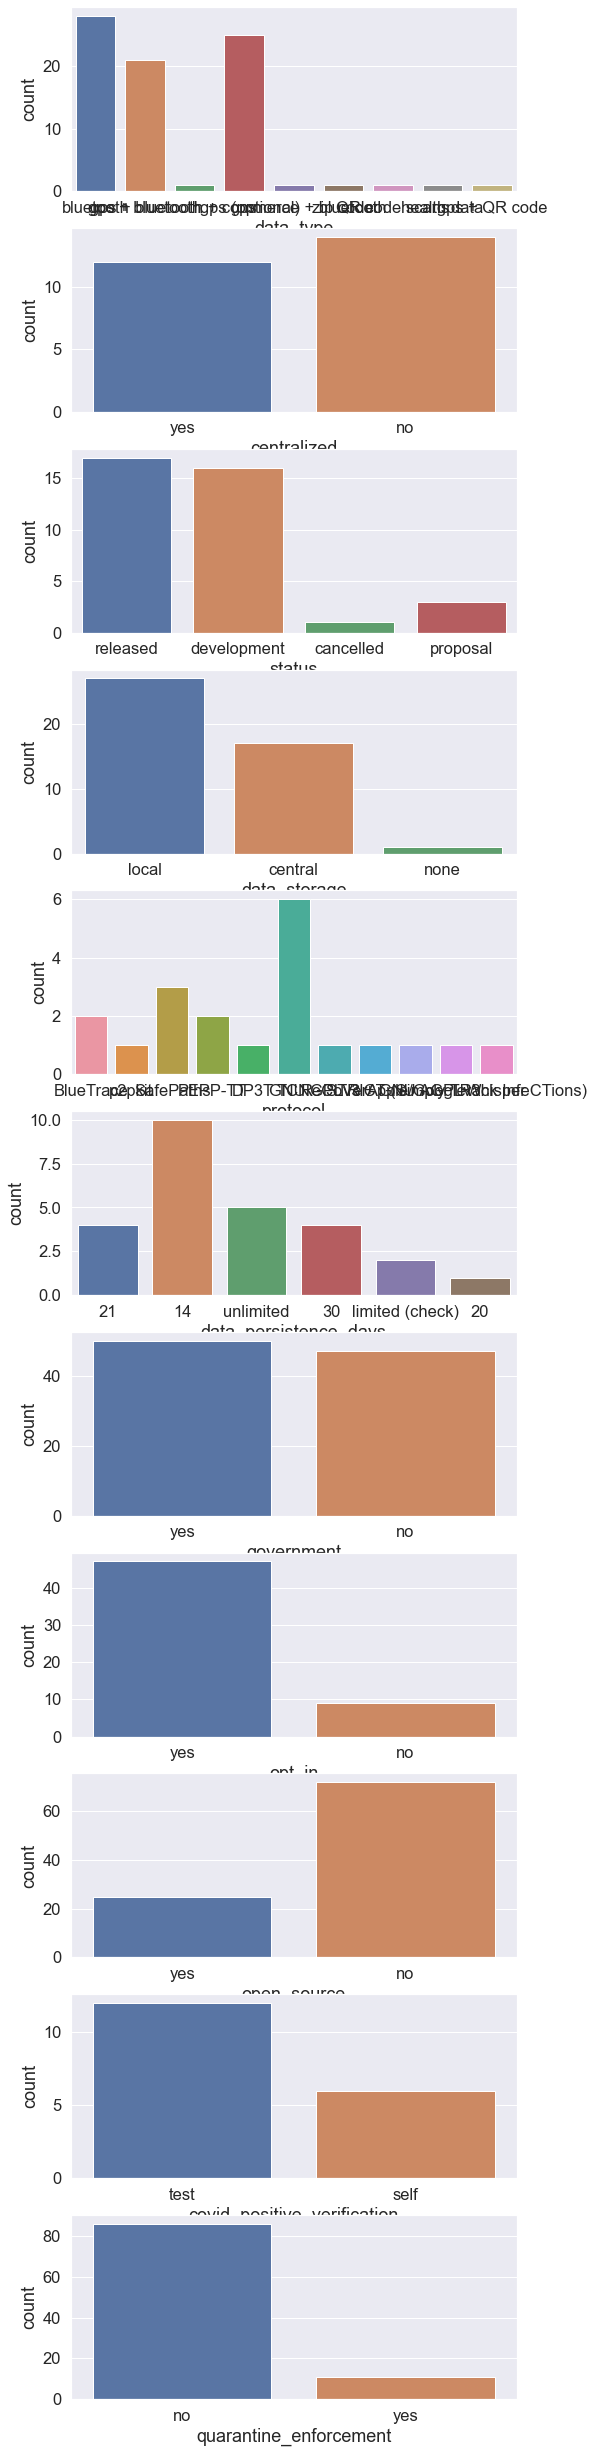

In [28]:
cols_to_plot = [
    'data_type',
    'centralized',
    'status',
    'data_storage',
    'protocol',
    'data_persistence_days',
    'government',
    'opt_in',
    'open_source',
    'covid_positive_verification',
    'quarantine_enforcement'
]
ncols = 1
width = 8
height = 4
fig, axs = plt.subplots(int(np.ceil(len(cols_to_plot) / ncols)), ncols, figsize=(ncols * width, len(cols_to_plot) / ncols * height))
for col, ax in zip(cols_to_plot, axs.flat):
    subset = df_apps.query(f'{col} != "unknown"')
    sns.countplot(x=col, data=subset, ax=ax)
plt.show()

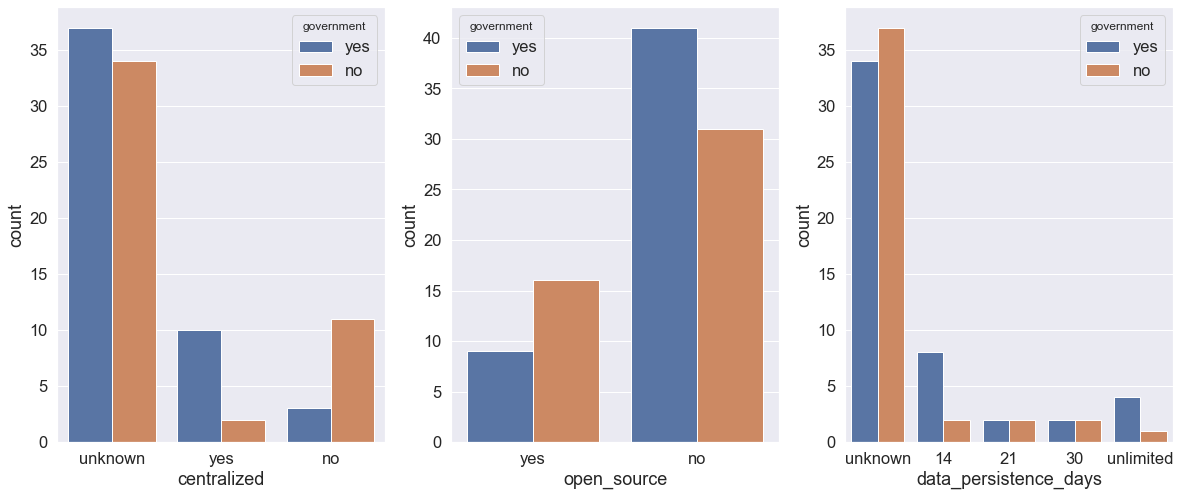

In [29]:
# Looking at government vs. different variables
day_order = ['unknown', '14', '21', '30', 'unlimited']
cols = [
    'centralized',
    'open_source',
    'data_persistence_days'
]
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
for col, ax in zip(cols, axs):
    if col == 'data_persistence_days':
        sns.countplot(x=col, ax=ax, hue='government', order=day_order, data=df_apps)
    else:
        sns.countplot(x=col, ax=ax, hue='government', data=df_apps)
plt.savefig(config.figs / 'gov_bars.png')
plt.show()

In [30]:
df_apps[df_apps['quarantine_enforcement'] == 'yes']

,name,country,links,platform,data_type,bluetooth,gps,centralized,status,data_storage,...,central_id_storage,data_persistence_days,government,contact_trace_aid,opt_in,open_source,encryption,covid_positive_verification,quarantine_enforcement,notes
3,BeAware,Bahrain,https://play.google.com/store/apps/details?id=...,mobile app,gps + bluetooth,yes,yes,yes,released,central,...,yes,14,yes,yes,yes,no,unknown,test,yes,
5,Alipay Health Code + Close Contact Detector,China,https://www.nytimes.com/2020/03/01/business/ch...,mobile app,gps + bluetooth + commerce,yes,yes,yes,released,central,...,yes,unlimited,yes,yes,no,no,unknown,unknown,yes,required to present colour code at all public ...
14,Stay Home Safe,Hong Kong,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,yes,no,unknown,no,unknown,unknown,yes,
17,SAIYAM,India,https://government.economictimes.indiatimes.co...,mobile app,gps,no,yes,unknown,unknown,central,...,yes,unknown,yes,no,no,no,unknown,test,yes,
18,CoBuddy,India,https://www.thehindu.com/news/national/tamil-n...,mobile app,gps,no,yes,unknown,unknown,central,...,yes,unknown,yes,no,no,no,unknown,test,yes,
37,Kwarantana Dommowa,Poland,https://www.politico.eu/article/poland-coronav...,mobile app,gps,no,yes,yes,released,central,...,yes,unlimited,yes,no,no,no,no,test,yes,
40,Tawakkalna,Saudi Arabia,unknown,mobile app,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,yes,no,no,no,unknown,unknown,yes,
44,Self-Quarantine App,South Korea,www.safekorea.go.kr,mobile app,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,yes,no,no,no,unknown,unknown,yes,
49,COVID Shield,Sri Lanka,https://covid.iq.lk/covid-shield-app.php,mobile app,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,no,no,yes,no,unknown,unknown,yes,
53,Дій вдома (Action at Home),Ukraine,https://apps.apple.com/US/app/id1504695512?l=en,mobile app,gps,no,yes,unknown,unknown,central,...,yes,unknown,yes,no,no,no,unknown,test,yes,


In [31]:
df_apps['data_persistence_days'].value_counts()

unknown            71
14                 10
unlimited           5
30                  4
21                  4
limited (check)     2
20                  1
Name: data_persistence_days, dtype: int64